## Import needed libraries and set figure dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime
import particle_swarm
plt.rcParams['figure.figsize'] = [20, 10]

## Set seed for reproducibility

In [2]:
random.seed(10)
np.random.seed(10)

## Load dataset

In [3]:
cities = np.genfromtxt('cities.csv', delimiter=',', skip_header = 1) # load as numpy array

## Show dataset distribution

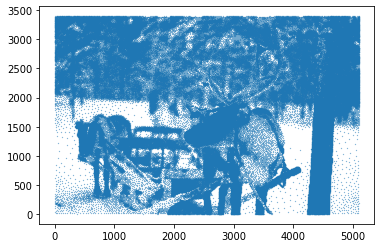

In [4]:
plt.scatter(cities[:,1], cities[:,2], s=0.05)

## Apply PSO to whole dataset

## PSO
In the following code the particle swarm optimization (PSO) algorithm will be applied to the entire dataset. The algorithm will generate 30 starting particles and their related velocities: it will stop when the solution no longer improves for 100 consecutive iterations or 1 000 iterations are completed.
The algorithm returns two parameters:
- A list, *results_for_each_iteration_whole*, whose elements are a given algorithm iteration and the best distance found so far
- The best path found so far, without the North Pole as starting and ending city

Execution times are monitored in order to compare the execution times between PSO and the hybrid evolutionary PSO implementation (HPSO).

In [5]:
start = datetime.now()
results_for_each_iteration_whole, best_path_whole = particle_swarm.particle_swarm_optimization(cities)
end = datetime.now()
print("Execution time: {}".format(end-start))
print(results_for_each_iteration_whole[-1])

Iteration: 100, minimum distance so far: 445426400.42640436
Iteration: 200, minimum distance so far: 445362030.2854708
Iteration: 300, minimum distance so far: 445310984.3380803
Iteration: 400, minimum distance so far: 445286288.6574812
Iteration: 500, minimum distance so far: 445272089.8910454
Iteration: 600, minimum distance so far: 445256475.54201895
Iteration: 700, minimum distance so far: 445243031.51012594
Iteration: 800, minimum distance so far: 445227439.1452168
Iteration: 900, minimum distance so far: 445205028.1051551
Iteration: 1000, minimum distance so far: 445191308.05395937
Execution time: 0:23:09.087746
[1000, 445191308.05395937]


## HPSO
The following code acts in a similar way to the one above (same starting parameters and same returned values). The only difference is that it represent the HPSO version: at each step the particles and velocities of the worst half of the population are replaced with the best half ones

In [6]:
start = datetime.now()
results_for_each_iteration_whole_h, best_path_whole_h = particle_swarm.particle_swarm_optimization(cities, hybrid_evolutionary_approach=True)
end = datetime.now()
print("Execution time: {}".format(end-start))
print(results_for_each_iteration_whole_h[-1])

Iteration: 100, minimum distance so far: 445142148.1989447
Execution time: 0:04:40.741610
[194, 445142148.1989447]


HPSO is faster than PSO and it lead to a better solution, even though PSO ended because it reached 1000 iterations: an increase in these parameter will surely lead to a better solution, even though the execution time will surely increase.

# Evaluate PSO on different clusters

The 1000 clusters generated via K-Means in the "GA" notebooks are used, so that both metaheuristics algorithms will work in the same conditions.

In [8]:
clusters = np.genfromtxt('files/1000subsets.txt', skip_header = 0).astype(int)

In [9]:
clusters

array([894, 654, 614, ..., 263, 305,  80])

## Apply PSO on clusters
### Standard PSO
In this customised version the PSO algorithm is applied to each cluster independently in order to minimize the Euclidean distance between cities, not considering the North Pole as starting and ending point of each cluster: PSO is applied to each cluster 1000 times or until the best solution no longer improves for 100 consecutive iterations.

After that the best path for each cluster is chosen and PSO is applied for finding the best order of this subpath: the algorithm focuses only on how to order the 1000 clusters, leaving untouched the solutions found on the previous step. In this step the goal is to minimize the *edp* distance: this function, short for Euclidean Distance with Penalties, is the particular distance function associated with this problem. It computes the total length of a route through the cities as the Euclidean distance between each step, but each 10th step originating from a non-prime city suffers a 10% penalty.

The returned values are the same as before, with the adding of the time when PSO finished working on all clusters indipendently: in this way it will be possible to have a better idea on how many minutes it required to perform the two macro operations.

In [10]:
start_pso_1k = datetime.now()
results_for_each_iteration_1k, final_path_1k, clusters_best_path_1k, end_pso_each_cluster_1k = particle_swarm.cluster_particle_swarm_optimization(cities, clusters)
end_pso_1k = datetime.now()
print("Execution time: {}".format(end_pso_1k-start_pso_1k))
print(results_for_each_iteration_1k[-1])

Start working on cluster 0
Start working on cluster 100
Start working on cluster 200
Start working on cluster 300
Start working on cluster 400
Start working on cluster 500
Start working on cluster 600
Start working on cluster 700
Start working on cluster 800
Start working on cluster 900
Ended PSO on each cluster
Iteration_overall: 100, min_distance: 10456245.536877701
The algorithm is no longer improving
Execution time: 1:11:07.052029
[144, 10456245.536877701]


### HPSO
In this case HPSO is used for finding, in each cluster, the subpath that minimize the Euclidean Distance and for finding the right clustering order that minimizes the edp distance function.

In [11]:
start_1k_h = datetime.now()
results_for_each_iteration_1k_hybrid, final_path_1k_hybrid, clusters_best_path_1k_hybrid, end_pso_each_cluster_1k_hybrid= particle_swarm.cluster_particle_swarm_optimization(cities, clusters, hybrid_evolutionary_approach=True)
end_1k_h = datetime.now()
print("Execution time: {}".format(end_1k_h-start_1k_h))
print(results_for_each_iteration_1k_hybrid[-1])

Start working on cluster 0
Start working on cluster 100
Start working on cluster 200
Start working on cluster 300
Start working on cluster 400
Start working on cluster 500
Start working on cluster 600
Start working on cluster 700
Start working on cluster 800
Start working on cluster 900
Ended PSO on each cluster
Iteration_overall: 100, min_distance: 9691462.783317182
Iteration_overall: 200, min_distance: 9667538.848332087
The algorithm is no longer improving
Execution time: 1:47:54.286529
[256, 9667538.848332087]


# Evaluate execution times for "clusterized" PSO

## PSO
### Minimize euclidean distance inside each cluster

In [13]:
print(end_pso_each_cluster_1k - start_pso_1k)

0:35:44.843810


### Clusters combination for minimizing edp

In [14]:
print(end_pso_1k - end_pso_each_cluster_1k)

0:35:22.208219


## HPSO
### Minimize euclidean distance inside each cluster

In [16]:
print(end_pso_each_cluster_1k_hybrid - start_1k_h)

0:42:44.924602


### Clusters combination for minimizing edp

In [17]:
print(end_1k_h - end_pso_each_cluster_1k_hybrid)

1:05:09.361927


Save the best path, so that it will be possible

In [19]:
np.savetxt('files/HPSO_in_clusts.txt', final_path_1k_hybrid)

# Use SA for further improving the solution
In the next code chunks the Simulated Annealing algorithm will be used for further optimizing the route found by HPSO, because it is the one that lead to the best EDP distance so far.

### Initialize support variables necessaries for implementing SA

In [20]:
from santas_path import edp, not_prime
from sa import SA
np_not_prime = np.vectorize(not_prime)
nums = np.arange(0, len(cities))
not_primes_bool = np_not_prime(nums)
clusters = np.repeat(np.arange(1000), 200)[:len(cities)-1]
sorted_cities = cities[final_path_1k_hybrid]
kscities = np.concatenate((sorted_cities, clusters[:, np.newaxis]), 1)
n = len(np.unique(clusters))
subs = [0]*n
for i in range(n):
    subs[i] = kscities[kscities[:, 3] == i][:, :3]
a = [0]*n
b = [0]*n
c = [0]*n
for i in range(n):
    a[i] = np.arange(len(subs[i]))
start_route_w0 = final_path_1k_hybrid
c_ids = [el[:,0] for el in subs]

### Apply SA for improving the solution

In [21]:
from santas_path import edp_unordered_straight
from sa import reverse_primes_mutation
np.random.seed(4)
start = datetime.now()
startl = datetime.now()
p = 0
last_dist = edp(start_route_w0, cities, not_primes_bool)
initial_dist = last_dist
print('Initial distance: {}'.format(last_dist))
for i in range(n):
    if (i % 100 == 0) and (i > 0):
        print('\nStart Loop {} at {}'.format(i, startl))
    
    perm_init = np.arange(len(subs[i]))
    a[i], b[i], c[i] = SA(subs[i], edp_unordered_straight, reverse_primes_mutation,
                          black_list = not_primes_bool, scale = 100000, n_to_mute= 10,
                          maxIter = np.inf,perm_init = perm_init, maxIterNoChange=1000)
    if ((i % (99 + p) == 0) or (i == n - 1)) and i > 0:
        p += 100
        endl = datetime.now()
        print('End loop {} at {}: {} seconds'.format(i, endl, (endl-startl).total_seconds()))
        startl = datetime.now()
    if i % 10 == 0:
        temp_routes = []
        for j in range(n):
            temp_routes.append(c_ids[j][a[j]])
        temp_full_route = np.concatenate(temp_routes).astype(int)
        temp_full_route = np.concatenate(([0], temp_full_route))
        temp_tot = edp(temp_full_route[1:], cities, not_primes_bool)
        print('\nLoop {}, Total distance so far: {}'.format(i, temp_tot))   
        if all(np.isin(temp_full_route, cities[:,0])) and all(np.isin(cities[:,0], temp_full_route)):
            print("Checked: the path goes through all cities")
        print('Improvement: {}'.format(temp_tot - last_dist))
        print('Total Improvement: {}'.format(temp_tot - initial_dist))
        last_dist = temp_tot        
end = datetime.now()
print('\nTotal time: {}'.format((end-start).total_seconds()))

Initial distance: 9667538.848332087

Loop 0, Total distance so far: 9667481.105595233
Checked: the path goes through all cities
Improvement: -57.74273685365915
Total Improvement: -57.74273685365915

Loop 10, Total distance so far: 9666448.5103988
Checked: the path goes through all cities
Improvement: -1032.5951964333653
Total Improvement: -1090.3379332870245

Loop 20, Total distance so far: 9665065.14012916
Checked: the path goes through all cities
Improvement: -1383.3702696394175
Total Improvement: -2473.708202926442

Loop 30, Total distance so far: 9663934.76613946
Checked: the path goes through all cities
Improvement: -1130.3739896994084
Total Improvement: -3604.0821926258504

Loop 40, Total distance so far: 9661828.187828362
Checked: the path goes through all cities
Improvement: -2106.5783110987395
Total Improvement: -5710.66050372459

Loop 50, Total distance so far: 9659202.25167159
Checked: the path goes through all cities
Improvement: -2625.936156772077
Total Improvement: -8336.


Loop 470, Total distance so far: 9582029.227026312
Checked: the path goes through all cities
Improvement: -1830.459364200011
Total Improvement: -85509.6213057749

Loop 480, Total distance so far: 9579849.989725731
Checked: the path goes through all cities
Improvement: -2179.2373005803674
Total Improvement: -87688.85860635526

Loop 490, Total distance so far: 9576838.881380375
Checked: the path goes through all cities
Improvement: -3011.1083453558385
Total Improvement: -90699.9669517111
End loop 499 at 2019-07-07 22:44:14.597577: 254.547374 seconds

Start Loop 500 at 2019-07-07 22:44:14.597690

Loop 500, Total distance so far: 9575099.398818625
Checked: the path goes through all cities
Improvement: -1739.4825617503375
Total Improvement: -92439.44951346144

Loop 510, Total distance so far: 9573472.281385874
Checked: the path goes through all cities
Improvement: -1627.1174327507615
Total Improvement: -94066.5669462122

Loop 520, Total distance so far: 9571104.566697363
Checked: the path 


Loop 940, Total distance so far: 9496604.540012673
Checked: the path goes through all cities
Improvement: -1541.9523285068572
Total Improvement: -170934.30831941403

Loop 950, Total distance so far: 9495281.74556753
Checked: the path goes through all cities
Improvement: -1322.79444514215
Total Improvement: -172257.10276455618

Loop 960, Total distance so far: 9493274.734830622
Checked: the path goes through all cities
Improvement: -2007.0107369087636
Total Improvement: -174264.11350146495

Loop 970, Total distance so far: 9491319.933245476
Checked: the path goes through all cities
Improvement: -1954.8015851452947
Total Improvement: -176218.91508661024

Loop 980, Total distance so far: 9489411.971304426
Checked: the path goes through all cities
Improvement: -1907.9619410503656
Total Improvement: -178126.8770276606
End loop 988 at 2019-07-07 23:04:16.571144: 206.869581 seconds

Total time: 2446.74735


In [22]:
c_ids = [el[:,0] for el in subs]
routes = []
for i in range(n):
    routes.append(c_ids[i][a[i]])

final_full_route = np.concatenate(routes).astype(int)
final_full_route = np.concatenate(([0], final_full_route))

Save path found via SA

In [23]:
np.savetxt('files/HPSO_final_after_sa.txt', final_full_route)

Save all the other paths just in case of needing

In [24]:
np.savetxt("files/PSO_whole_dataset.txt", best_path_whole)

In [25]:
np.savetxt("files/HPSO_whole_dataset.txt", best_path_whole_h)

In [26]:
np.savetxt('files/PSO_in_clusts.txt', final_path_1k)

# Routes evaluation

In this section we will evaluate all the routes that were find, so that it will be possible to compile the report correctly

## PSO on whole dataset - "Standard" approach

In [27]:
edp(best_path_whole, cities, not_primes_bool)

445191308.05395937

## PSO on whole dataset - "Hybrid evolutionary" approach

In [28]:
edp(best_path_whole_h, cities, not_primes_bool)

445142148.1989447

## PSO on 1000 clusters - Standard approach

### Starting solution after applying PSO on clusters

In [29]:
results_for_each_iteration_1k[0][1]

10501353.49078787

### Final solution

In [30]:
edp(final_path_1k, cities, not_primes_bool)

10456245.536877701

## HPSO on 1000 clusters

### Starting solution after applying PSO on clusters

In [31]:
results_for_each_iteration_1k_hybrid[0][1]

9726464.906046579

### Final solution

In [32]:
edp(final_path_1k_hybrid, cities, not_primes_bool)

9667538.848332087

## SA on best solution (HPSO - 1000 clusters)

In [33]:
edp(final_full_route,cities, not_primes_bool)

9487836.175999215

### Time required by SA

In [34]:
print(end-start)

0:40:46.747350
